# Data Wrangling


### Import the libraries

We will be mostly using `pandas`.


In [1]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np
from metpy.calc import wet_bulb_temperature
from metpy.units import units

### Load the file


In [2]:
data_frame = pd.read_csv("raw_data.csv")

## Null values


In [3]:
# Check for missing values
data_frame.isnull().sum()

time                   0
wmo                    0
name                   0
history_product        0
air_temp              16
apparent_t            27
dewpt                 18
rel_hum               18
delta_t               18
wind_dir_deg           9
wind_spd_kmh           9
gust_kmh              16
rain_trace           349
rain_ten              40
rain_hour             77
duration_from_9am    349
press                  4
lat                    0
lon                    0
location               0
dtype: int64

In [4]:
# Remove Null values
data_frame = data_frame.dropna()
data_frame.isnull().sum()

time                 0
wmo                  0
name                 0
history_product      0
air_temp             0
apparent_t           0
dewpt                0
rel_hum              0
delta_t              0
wind_dir_deg         0
wind_spd_kmh         0
gust_kmh             0
rain_trace           0
rain_ten             0
rain_hour            0
duration_from_9am    0
press                0
lat                  0
lon                  0
location             0
dtype: int64

## Duplicate Values


In [5]:
# Find duplicates
data_frame.duplicated().sum()

np.int64(0)

In [6]:
# Remove duplicates
data_frame = data_frame.drop_duplicates()
data_frame.duplicated().sum()

np.int64(0)

## Time Management


In [7]:
# Show time values
print(data_frame["time"])

0        2024-05-13T16:30:00+10:00
1        2024-05-13T17:00:00+10:00
2        2024-05-13T17:30:00+10:00
3        2024-05-13T18:00:00+10:00
4        2024-05-13T18:30:00+10:00
                   ...            
15106    2025-04-09T11:00:00+10:00
15107    2025-04-09T11:30:00+10:00
15108    2025-04-09T12:00:00+10:00
15109    2025-04-09T12:30:00+10:00
15110    2025-04-09T13:00:00+10:00
Name: time, Length: 14714, dtype: object


In [8]:


master_time = data_frame["time"]

for time1_value in master_time:
    time_value = dt.datetime.fromisoformat(time1_value)
    # print(time_value)
    # if timezone is +11:00
    if str(time_value.tzinfo) == "UTC+11:00":
        print(f"{time_value} \t Timezone is +11:00", end="\t")
        time_value = time_value.astimezone(dt.timezone(dt.timedelta(hours=10))) # convert to +10:00 timezone
        print(f"{time_value} \t Timezone is now +10:00")
    else:
        print(f"{time_value} \t Timezone is +10:00")

data_frame["time"] = master_time

2024-05-13 16:30:00+10:00 	 Timezone is +10:00
2024-05-13 17:00:00+10:00 	 Timezone is +10:00
2024-05-13 17:30:00+10:00 	 Timezone is +10:00
2024-05-13 18:00:00+10:00 	 Timezone is +10:00
2024-05-13 18:30:00+10:00 	 Timezone is +10:00
2024-05-13 19:00:00+10:00 	 Timezone is +10:00
2024-05-13 19:30:00+10:00 	 Timezone is +10:00
2024-05-13 20:00:00+10:00 	 Timezone is +10:00
2024-05-13 20:30:00+10:00 	 Timezone is +10:00
2024-05-13 21:00:00+10:00 	 Timezone is +10:00
2024-05-13 21:30:00+10:00 	 Timezone is +10:00
2024-05-13 22:00:00+10:00 	 Timezone is +10:00
2024-05-13 23:00:00+10:00 	 Timezone is +10:00
2024-05-14 00:00:00+10:00 	 Timezone is +10:00
2024-05-14 01:00:00+10:00 	 Timezone is +10:00
2024-05-14 01:30:00+10:00 	 Timezone is +10:00
2024-05-14 02:00:00+10:00 	 Timezone is +10:00
2024-05-14 02:30:00+10:00 	 Timezone is +10:00
2024-05-14 03:00:00+10:00 	 Timezone is +10:00
2024-05-14 03:30:00+10:00 	 Timezone is +10:00
2024-05-14 04:00:00+10:00 	 Timezone is +10:00
2024-05-14 04

Sorting time:

In [9]:
data_frame["time"] = data_frame["time"].apply(
    lambda value: int(dt.datetime.fromisoformat(value).timestamp())
)


print(data_frame["time"])

0        1715581800
1        1715583600
2        1715585400
3        1715587200
4        1715589000
            ...    
15106    1744160400
15107    1744162200
15108    1744164000
15109    1744165800
15110    1744167600
Name: time, Length: 14714, dtype: int64


## Removing Unneeded Columns

These columns do not change and will add further unnecessary data.


In [10]:
# Drop columns that are not needed
"""
Included columns:
- wmo
- name
- history_product
- lat
- lon
- location
"""

data_frame = data_frame.drop(
    columns=[
        "wmo",
        "name",
        "history_product",
        "lat",
        "lon",
        "location",
        "duration_from_9am",
    ]
)
print(data_frame)

             time  air_temp  apparent_t  dewpt  rel_hum  delta_t  \
0      1715581800      19.3        16.1   15.2     77.0      2.4   
1      1715583600      18.9        16.9   15.4     80.0      2.1   
2      1715585400      18.7        16.7   15.0     79.0      2.2   
3      1715587200      18.4        16.8   15.1     81.0      1.9   
4      1715589000      18.0        16.7   14.7     81.0      1.9   
...           ...       ...         ...    ...      ...      ...   
15106  1744160400      20.4        21.2   17.4     83.0      1.8   
15107  1744162200      20.8        21.1   17.0     79.0      2.3   
15108  1744164000      21.1        20.7   16.1     73.0      3.0   
15109  1744165800      21.8        19.6   15.9     69.0      3.5   
15110  1744167600      22.7        20.5   16.9     70.0      3.5   

       wind_dir_deg  wind_spd_kmh  gust_kmh  rain_trace  rain_ten  rain_hour  \
0             195.0          26.0      32.0         0.0       0.0        0.0   
1             203.0    

In [11]:
# calculate the wet bulb temperature
press = np.array(data_frame["press"]) * units.hPa
air_temp = np.array(data_frame["air_temp"]) * units.degC
dewpt = np.array(data_frame["dewpt"]) * units.degC

data_frame["wet_bulb_temperature"] = (
    np.round(wet_bulb_temperature(press, air_temp, dewpt).to("degC").m, 1)
)

print(data_frame['wet_bulb_temperature'].head(10))

0    16.6
1    16.6
2    16.3
3    16.3
4    15.9
5    15.9
6    16.1
7    15.5
8    15.4
9    15.1
Name: wet_bulb_temperature, dtype: float64


## Scaling Features


In [12]:
feature = data_frame.columns
for feature in data_frame.columns:
    min = data_frame[feature].min()
    max = data_frame[feature].max()
    print(f"{feature:<25} | Min: {min:<15} | Max: {max:<15}")

time                      | Min: 1715581800      | Max: 1744167600     
air_temp                  | Min: 5.6             | Max: 41.5           
apparent_t                | Min: -1.1            | Max: 39.5           
dewpt                     | Min: -12.3           | Max: 24.1           
rel_hum                   | Min: 7.0             | Max: 98.0           
delta_t                   | Min: 0.2             | Max: 17.3           
wind_dir_deg              | Min: 0.0             | Max: 360.0          
wind_spd_kmh              | Min: 0.0             | Max: 70.0           
gust_kmh                  | Min: 0.0             | Max: 93.0           
rain_trace                | Min: 0.0             | Max: 81.4           
rain_ten                  | Min: 0.0             | Max: 6.2            
rain_hour                 | Min: 0.0             | Max: 28.4           
press                     | Min: 992.9           | Max: 1039.6         
wet_bulb_temperature      | Min: 3.8             | Max: 25.5    

In [13]:
# # Normalise the data
# feature = "press"

# try:
#     min = float(data_frame[feature].min())
#     max = float(data_frame[feature].max())
#     # min = float(0)
#     # max = float(100)
# except ValueError:
#     print(f"Cannot normalise {feature}")
#     exit()

# data_frame[feature] = (data_frame[feature] - min) / (max - min)
# print(data_frame[feature])

for feature in data_frame.columns:
    if feature == "time":
        continue
    elif feature in ["wind_spd_kmh", "gust_kmh"]:
        try:
            min = float(data_frame[["wind_spd_kmh", "gust_kmh"]].min().min())
            max = float(data_frame[["wind_spd_kmh", "gust_kmh"]].max().max())
            data_frame[feature] = (data_frame[feature] - min) / (max - min)
        except ValueError:
            print(f"Cannot normalise {feature}")
    elif feature in ["air_temp", "dewpt", "wet_bulb_temperature"]:
        try:
            min = float(
                data_frame[["air_temp", "dewpt", "wet_bulb_temperature"]].min().min()
            )
            max = float(
                data_frame[["air_temp", "dewpt", "wet_bulb_temperature"]].max().max()
            )
            data_frame[feature] = (data_frame[feature] - min) / (max - min)
        except ValueError:
            print(f"Cannot normalise {feature}")
    elif feature not in ["rel_hum", "wind_dir_deg"]:
        try:
            min = float(data_frame[feature].min())
            max = float(data_frame[feature].max())
            data_frame[feature] = (data_frame[feature] - min) / (max - min)
        except ValueError:
            print(f"Cannot normalise {feature}")
    else:
        if feature == "rel_hum":
            data_frame[feature] = data_frame[feature] / 100
        elif feature == "wind_dir_deg":
            data_frame[feature] = data_frame[feature] / 360

print(data_frame)

             time  air_temp  apparent_t     dewpt  rel_hum   delta_t  \
0      1715581800  0.587361    0.423645  0.727513     0.77  0.128655   
1      1715583600  0.579926    0.443350  0.732804     0.80  0.111111   
2      1715585400  0.576208    0.438424  0.722222     0.79  0.116959   
3      1715587200  0.570632    0.440887  0.724868     0.81  0.099415   
4      1715589000  0.563197    0.438424  0.714286     0.81  0.099415   
...           ...       ...         ...       ...      ...       ...   
15106  1744160400  0.607807    0.549261  0.785714     0.83  0.093567   
15107  1744162200  0.615242    0.546798  0.775132     0.79  0.122807   
15108  1744164000  0.620818    0.536946  0.751323     0.73  0.163743   
15109  1744165800  0.633829    0.509852  0.746032     0.69  0.192982   
15110  1744167600  0.650558    0.532020  0.772487     0.70  0.192982   

       wind_dir_deg  wind_spd_kmh  gust_kmh  rain_trace  rain_ten  rain_hour  \
0          0.541667      0.279570  0.344086    0.000000

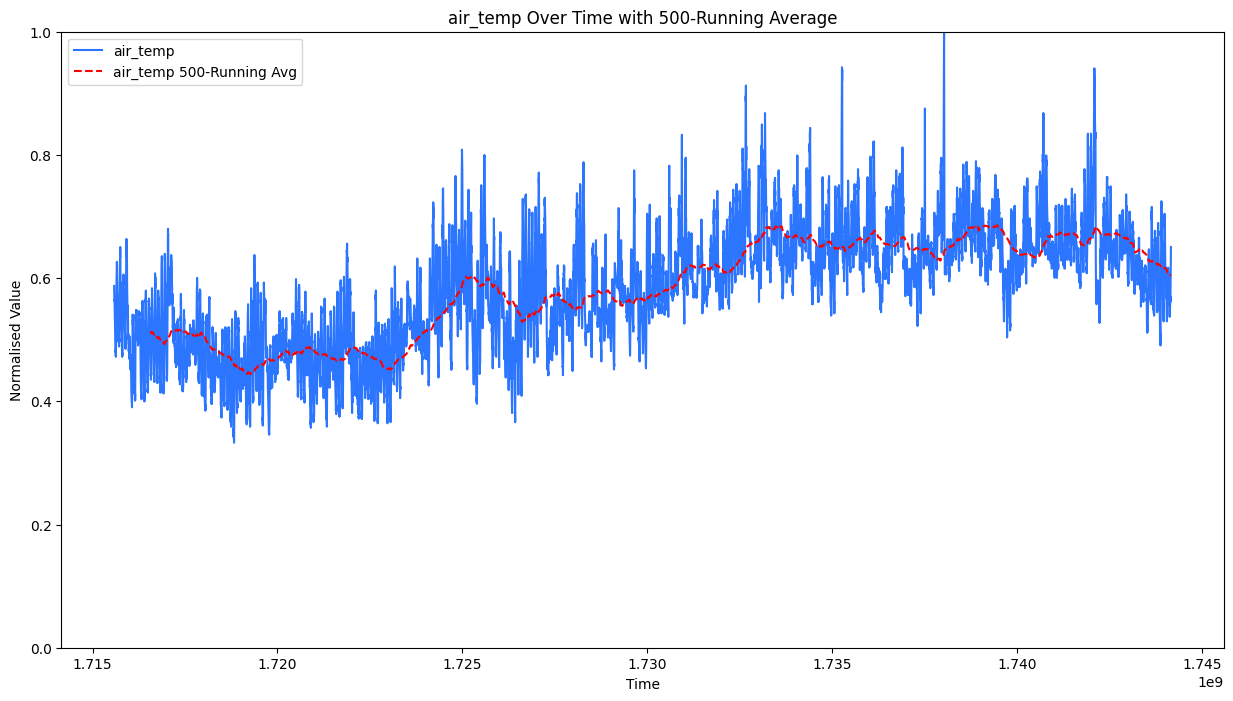

In [14]:
feature1 = "air_temp"
rolling_avg = int(500)

plt.figure(figsize=(15, 8))
plt.plot(
    data_frame["time"],
    data_frame[feature1],
    label=feature1,
    color="#2b75ff",
)
plt.plot(
    data_frame["time"],
    data_frame[feature1].rolling(window=rolling_avg).mean(),
    label=f"{feature1} {rolling_avg}-Running Avg",
    linestyle="--",
    color="red",
)
plt.xlabel("Time")
plt.ylabel("Normalised Value")
plt.title(f"{feature1} Over Time with {rolling_avg}-Running Average")
plt.ylim(0, 1)
plt.legend()
plt.show()

In [15]:
print(data_frame)

             time  air_temp  apparent_t     dewpt  rel_hum   delta_t  \
0      1715581800  0.587361    0.423645  0.727513     0.77  0.128655   
1      1715583600  0.579926    0.443350  0.732804     0.80  0.111111   
2      1715585400  0.576208    0.438424  0.722222     0.79  0.116959   
3      1715587200  0.570632    0.440887  0.724868     0.81  0.099415   
4      1715589000  0.563197    0.438424  0.714286     0.81  0.099415   
...           ...       ...         ...       ...      ...       ...   
15106  1744160400  0.607807    0.549261  0.785714     0.83  0.093567   
15107  1744162200  0.615242    0.546798  0.775132     0.79  0.122807   
15108  1744164000  0.620818    0.536946  0.751323     0.73  0.163743   
15109  1744165800  0.633829    0.509852  0.746032     0.69  0.192982   
15110  1744167600  0.650558    0.532020  0.772487     0.70  0.192982   

       wind_dir_deg  wind_spd_kmh  gust_kmh  rain_trace  rain_ten  rain_hour  \
0          0.541667      0.279570  0.344086    0.000000

In [16]:
data_frame.to_csv("../1.3. Feature Engineering/wrangled_data.csv", index=False)